In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/vaibhav/Downloads/housing.csv",header = 0)

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Missing values
* total_bedrooms

In [5]:
df.total_bedrooms = df.total_bedrooms.fillna(np.mean(df.total_bedrooms))

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


LONGITUDE


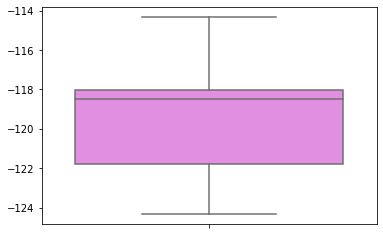

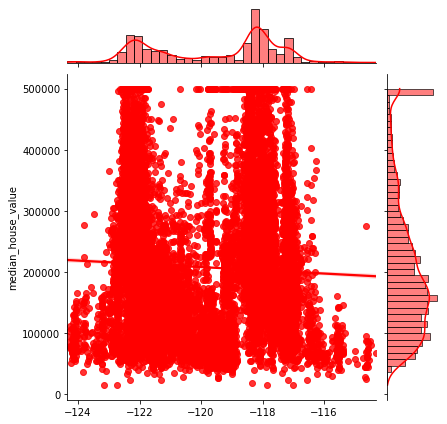


LATITUDE


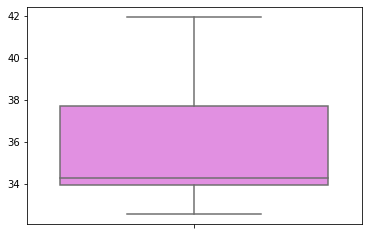

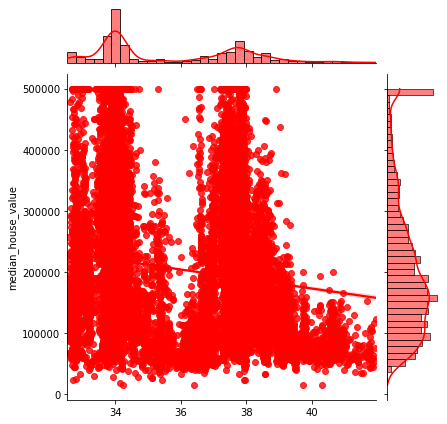


HOUSING_MEDIAN_AGE


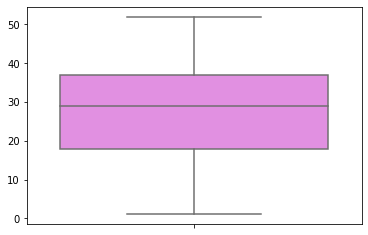

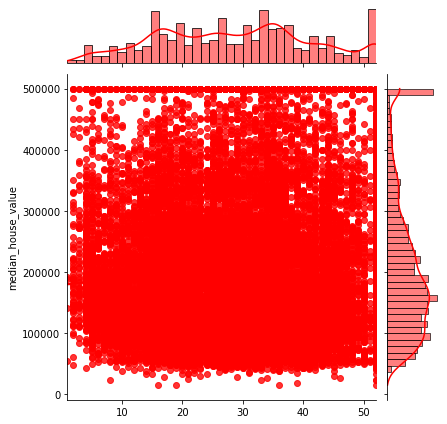


TOTAL_ROOMS


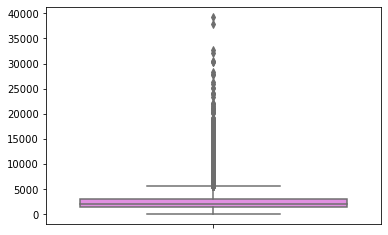

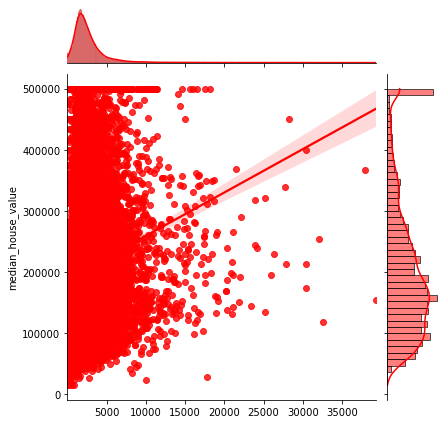


TOTAL_BEDROOMS


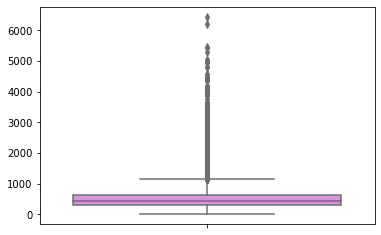

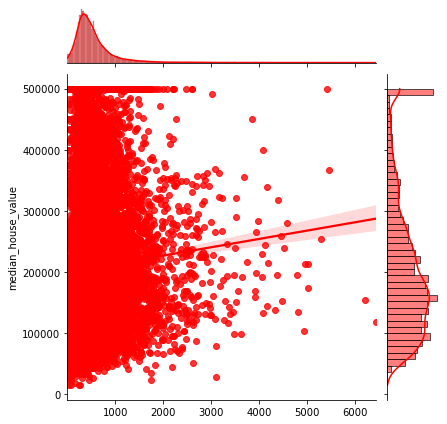


POPULATION


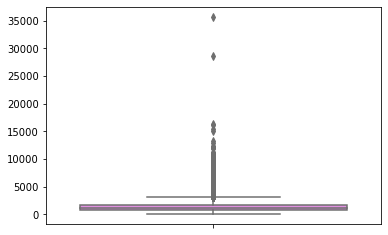

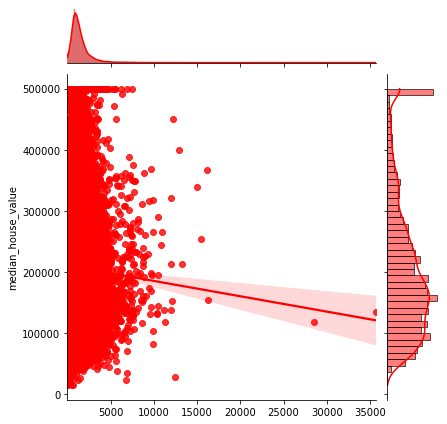


HOUSEHOLDS


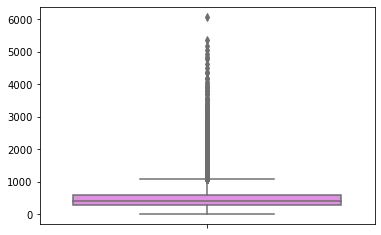

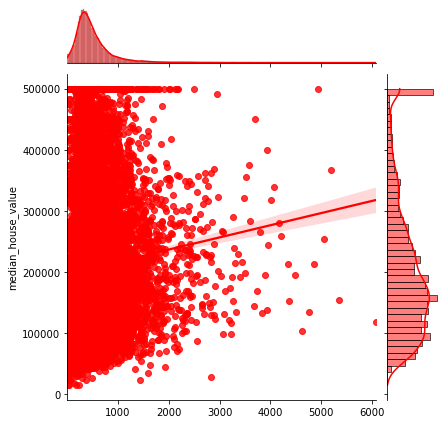


MEDIAN_INCOME


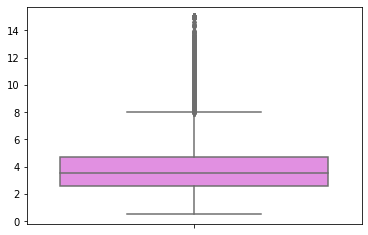

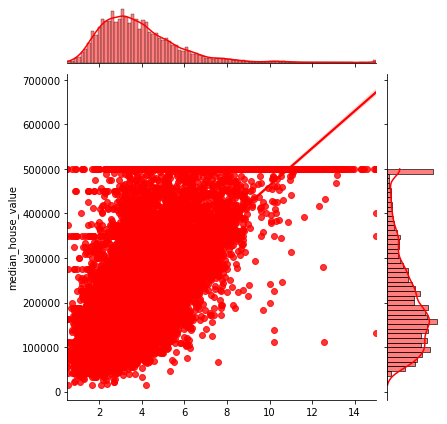

In [7]:
for i in df.drop(["ocean_proximity","median_house_value"] , axis = 1):
    
    print(i.upper())
    
    sns.boxplot(y = (np.array(df[i])),color="violet")
    
    p=sns.jointplot(y = df.median_house_value , x = (np.array(df[i])) ,kind="reg",color="red")
    plt.xlabel(i.upper())
    plt.ylabel("median_house_value".upper())
    
    plt.show()
    print()

# Outliers
* total_rooms
* total_bedrooms
* population
* households
* median_income

In [8]:
rooms_per = np.percentile(df.total_rooms,99)
print(rooms_per)
df[df.total_rooms > rooms_per*2]

11212.11000000003


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
922,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
6066,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN
9018,-118.72,34.14,7.0,23866.0,4407.0,9873.0,4012.0,5.4032,318500.0,NEAR OCEAN
9019,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN
9040,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,144000.0,INLAND
9145,-118.46,34.40,12.0,25957.0,4798.0,10475.0,4490.0,4.5420,195300.0,<1H OCEAN
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
12152,-117.27,33.68,8.0,26322.0,4072.0,9360.0,3361.0,5.3238,228900.0,<1H OCEAN


In [9]:
df.total_rooms[df.total_rooms > rooms_per*2] = rooms_per*2

<ipython-input-9-08fafff5438c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_rooms[df.total_rooms > rooms_per*2] = rooms_per*2


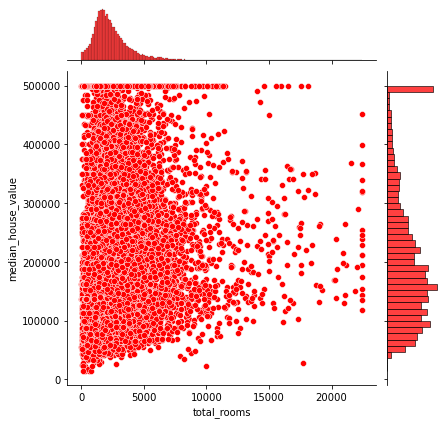

In [10]:
sns.jointplot(x=df.total_rooms , y=df.median_house_value,color ="red")

In [11]:
bedrooms_per = np.percentile(df.total_bedrooms,99)
print(bedrooms_per)
df[df.total_bedrooms > bedrooms_per*2]

2216.270000000004


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4035,-118.52,34.17,20.0,17377.00,4457.0,7450.0,4204.0,3.2154,259600.0,<1H OCEAN
6057,-117.78,34.03,8.0,22424.22,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
8985,-118.44,33.98,21.0,18132.00,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN
9145,-118.46,34.40,12.0,22424.22,4798.0,10475.0,4490.0,4.5420,195300.0,<1H OCEAN
9744,-121.68,36.72,12.0,19234.00,4492.0,12153.0,4372.0,3.2652,152800.0,<1H OCEAN
9880,-121.79,36.64,11.0,22424.22,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
10309,-117.74,33.89,4.0,22424.22,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
12106,-117.34,33.98,10.0,17286.00,4952.0,9851.0,4616.0,1.7579,103400.0,INLAND
12201,-117.20,33.58,2.0,22424.22,5033.0,9419.0,3197.0,4.5936,174300.0,<1H OCEAN
12215,-117.12,33.52,4.0,22424.22,4957.0,13251.0,4339.0,4.5841,212300.0,<1H OCEAN


<ipython-input-12-8cd9b96624ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_bedrooms[df.total_bedrooms > bedrooms_per*2] = bedrooms_per*2


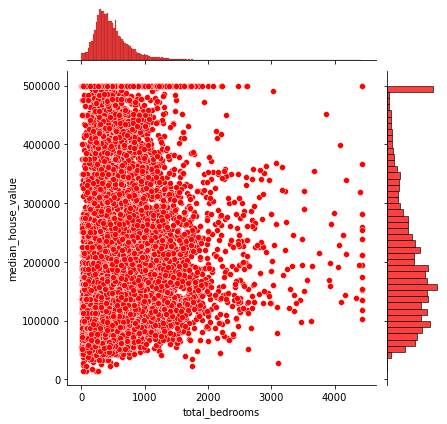

In [12]:
df.total_bedrooms[df.total_bedrooms > bedrooms_per*2] = bedrooms_per*2
sns.jointplot( x = df.total_bedrooms , y = df.median_house_value ,color="red")

In [13]:
population_per = np.percentile(df.population,99)
print(population_per)
df[df.population > population_per*2]

5805.830000000002


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
922,-121.92,37.53,7.0,22424.22,3864.00,12203.0,3701.0,8.4045,451100.0,<1H OCEAN
6057,-117.78,34.03,8.0,22424.22,4432.54,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
6066,-117.87,34.04,7.0,22424.22,4179.00,15037.0,4072.0,6.6288,339700.0,<1H OCEAN
9019,-118.78,34.16,9.0,22424.22,4093.00,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN
9122,-118.10,34.57,7.0,20377.00,4335.00,11973.0,3933.0,3.3086,138100.0,INLAND
9744,-121.68,36.72,12.0,19234.00,4432.54,12153.0,4372.0,3.2652,152800.0,<1H OCEAN
9880,-121.79,36.64,11.0,22424.22,4432.54,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
10309,-117.74,33.89,4.0,22424.22,4432.54,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
12215,-117.12,33.52,4.0,22424.22,4432.54,13251.0,4339.0,4.5841,212300.0,<1H OCEAN
12623,-121.53,38.48,5.0,22424.22,4432.54,11935.0,4855.0,4.8811,212200.0,INLAND


<ipython-input-14-5841aa41eadc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.population[df.population > population_per*2] = population_per*2


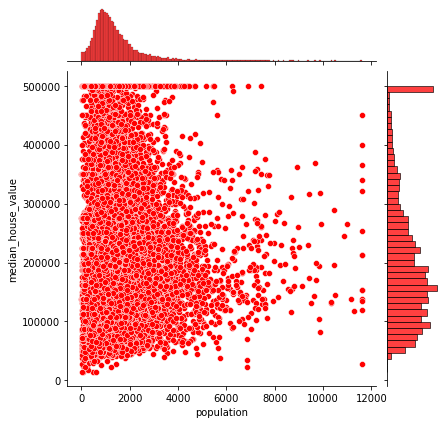

In [14]:
df.population[df.population > population_per*2] = population_per*2
sns.jointplot(x = df.population , y= df.median_house_value,color="red")

In [15]:
households_per = np.percentile(df.households,99)
print(households_per)
df[df.households > households_per*2]

1982.6600000000035


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4035,-118.52,34.17,20.0,17377.00,4432.54,7450.00,4204.0,3.2154,259600.0,<1H OCEAN
6057,-117.78,34.03,8.0,22424.22,4432.54,11611.66,5050.0,6.0191,253900.0,<1H OCEAN
6066,-117.87,34.04,7.0,22424.22,4179.00,11611.66,4072.0,6.6288,339700.0,<1H OCEAN
8985,-118.44,33.98,21.0,18132.00,4432.54,7431.00,4930.0,5.3359,500001.0,<1H OCEAN
9018,-118.72,34.14,7.0,22424.22,4407.00,9873.00,4012.0,5.4032,318500.0,NEAR OCEAN
9145,-118.46,34.40,12.0,22424.22,4432.54,10475.00,4490.0,4.5420,195300.0,<1H OCEAN
9744,-121.68,36.72,12.0,19234.00,4432.54,11611.66,4372.0,3.2652,152800.0,<1H OCEAN
9880,-121.79,36.64,11.0,22424.22,4432.54,11611.66,6082.0,2.3087,118800.0,<1H OCEAN
10309,-117.74,33.89,4.0,22424.22,4432.54,11611.66,5189.0,7.4947,366300.0,<1H OCEAN
12106,-117.34,33.98,10.0,17286.00,4432.54,9851.00,4616.0,1.7579,103400.0,INLAND


<ipython-input-16-6cf4640f397f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.households[df.households > households_per*2] = households_per*2


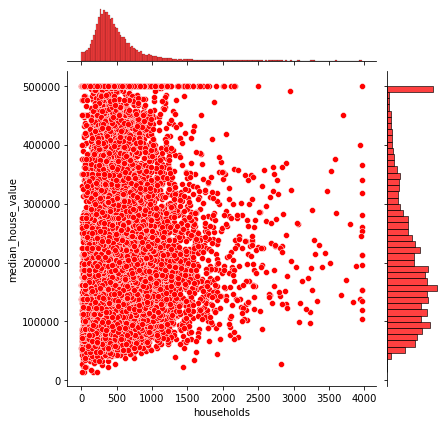

In [16]:
df.households[df.households > households_per*2] = households_per*2
sns.jointplot(x = df.households , y = df.median_house_value,color="red")

In [17]:
income_per = np.percentile(df.median_income,99)
print(income_per)
df[df.median_income > income_per*2]

10.596540000000003


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


<ipython-input-18-0d694fcfd160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.median_income[df.median_income > income_per*2] = income_per*2


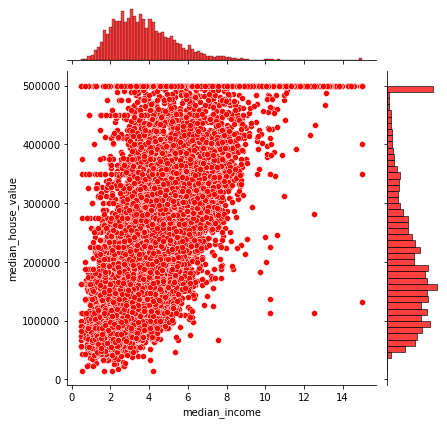

In [18]:
df.median_income[df.median_income > income_per*2] = income_per*2
sns.jointplot(x = df.median_income , y = df.median_house_value,color="red")

# Getting dummy variables

In [19]:
df = pd.get_dummies(df)

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2630.371849,537.386594,1422.403742,499.005078,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2120.100354,414.069557,1083.609523,376.643592,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,22424.220000,4432.540000,11611.660000,3965.320000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.045258,0.070057,0.103643,0.056081,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036680,-0.067429,-0.112673,-0.071989,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.367196,-0.321112,-0.305522,-0.305310,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.045258,-0.036680,-0.367196,1.000000,0.927465,0.862551,0.919059,0.201558,0.137059,-0.004320,0.026874,-0.007752,-0.022792,-0.009208
total_bedrooms,0.070057,-0.067429,-0.321112,0.927465,1.000000,0.881742,0.974374,-0.008133,0.049936,0.017875,-0.006466,-0.004398,-0.019620,0.001080
population,0.103643,-0.112673,-0.305522,0.862551,0.881742,1.000000,0.915395,0.005275,-0.025028,0.075465,-0.020250,-0.010837,-0.062623,-0.024544
households,0.056081,-0.071989,-0.305310,0.919059,0.974374,0.915395,1.000000,0.012865,0.066648,0.042309,-0.039840,-0.009192,-0.009744,0.002187
median_income,-0.015176,-0.079809,-0.119034,0.201558,-0.008133,0.005275,0.012865,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.137059,0.049936,-0.025028,0.066648,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.004320,0.017875,0.075465,0.042309,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [22]:
df["room_per_household"] = np.round(df.total_rooms / df.households)
df["person_per_household"] = np.round(df.population / df.households)
df["bedroom_per_household"] = np.round(df.total_bedrooms / df.households)

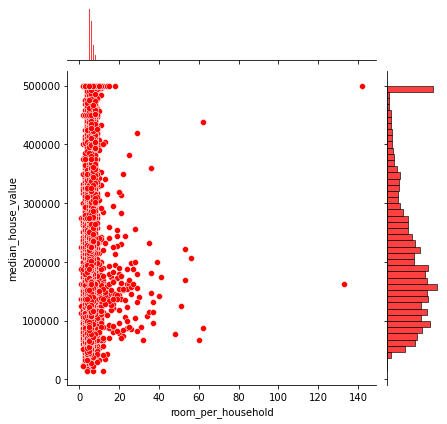

In [23]:
sns.jointplot(x=df.room_per_household , y=df.median_house_value,color="red")

In [24]:
rooms_per = np.percentile(df.room_per_household,99)
print(rooms_per)
df[df.room_per_household > rooms_per*2]

10.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,room_per_household,person_per_household,bedroom_per_household
1024,-120.00,38.52,16.0,3045.0,543.0,202.0,102.0,3.1500,140600.0,0,1,0,0,0,30.0,2.0,5.0
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,0,1,0,0,0,32.0,2.0,10.0
1234,-120.33,38.26,13.0,2962.0,546.0,252.0,103.0,4.4063,155800.0,0,1,0,0,0,29.0,2.0,5.0
1238,-120.27,38.29,10.0,3486.0,695.0,298.0,124.0,3.3542,103800.0,0,1,0,0,0,28.0,2.0,6.0
1239,-120.27,38.31,13.0,3297.0,662.0,267.0,97.0,3.0750,108300.0,0,1,0,0,0,34.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19736,-121.78,40.12,14.0,388.0,108.0,35.0,17.0,6.1359,106300.0,0,1,0,0,0,23.0,2.0,6.0
19975,-118.54,36.12,11.0,4103.0,882.0,356.0,171.0,2.1029,99100.0,0,1,0,0,0,24.0,2.0,5.0
19976,-118.37,36.19,10.0,443.0,111.0,48.0,21.0,3.1250,71300.0,0,1,0,0,0,21.0,2.0,5.0
20093,-120.12,38.12,37.0,3355.0,666.0,338.0,136.0,2.0625,88900.0,0,1,0,0,0,25.0,2.0,5.0


<ipython-input-25-fea63fd70c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.room_per_household[df.room_per_household > rooms_per*2] = rooms_per*2


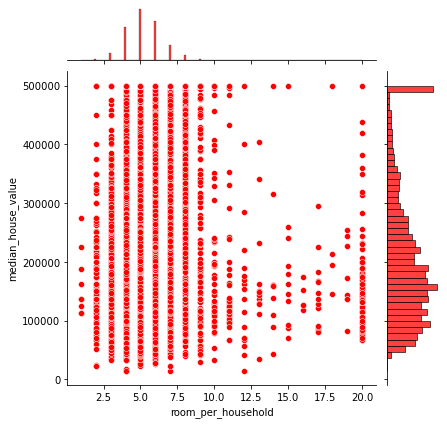

In [25]:
df.room_per_household[df.room_per_household > rooms_per*2] = rooms_per*2
sns.jointplot(x=df.room_per_household , y=df.median_house_value,color="red")

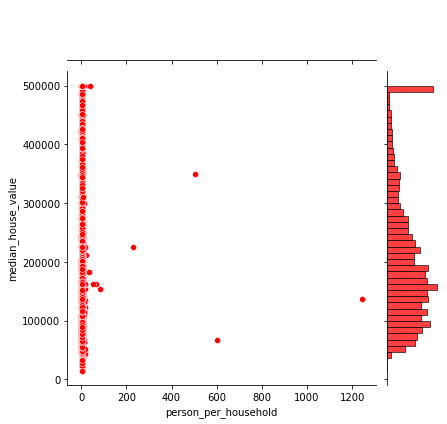

In [26]:
sns.jointplot(x=df.person_per_household , y=df.median_house_value,color="red")

In [27]:
person_per = np.percentile(df.person_per_household,99)
print(person_per)
df[df.person_per_household > person_per*2]

5.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,room_per_household,person_per_household,bedroom_per_household
270,-122.18,37.78,33.0,142.0,31.0,575.0,47.0,3.8750,225000.0,0,0,0,1,0,3.0,12.0,1.0
1039,-120.97,38.42,16.0,1748.0,322.0,4930.0,287.0,4.3029,121900.0,0,1,0,0,0,6.0,17.0,1.0
1067,-121.85,39.73,52.0,444.0,80.0,1107.0,98.0,3.4191,137500.0,0,1,0,0,0,5.0,11.0,1.0
1617,-122.08,37.84,17.0,1320.0,159.0,1722.0,141.0,11.7064,500001.0,0,0,0,1,0,9.0,12.0,1.0
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,0,1,0,0,0,20.0,14.0,4.0
2723,-115.50,32.75,13.0,330.0,72.0,822.0,64.0,3.4107,142500.0,0,1,0,0,0,5.0,13.0,1.0
2899,-119.01,35.37,35.0,120.0,35.0,477.0,41.0,1.9125,47500.0,0,1,0,0,0,3.0,12.0,1.0
3364,-120.51,40.41,36.0,36.0,8.0,4198.0,7.0,5.5179,67500.0,0,1,0,0,0,5.0,600.0,1.0
4479,-118.16,34.07,41.0,247.0,55.0,925.0,50.0,3.5769,135700.0,1,0,0,0,0,5.0,18.0,1.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,1,0,0,0,0,2.0,12.0,1.0


<ipython-input-28-2dc62d4748e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.person_per_household[df.person_per_household > person_per*2] = person_per*2


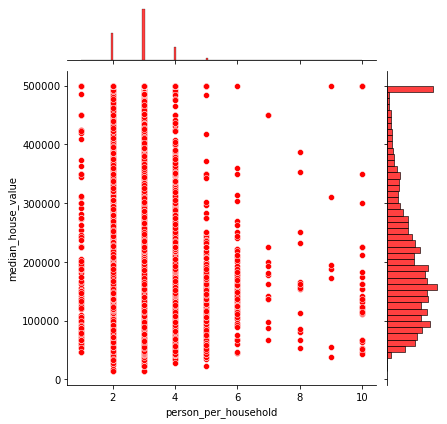

In [28]:
df.person_per_household[df.person_per_household > person_per*2] = person_per*2
sns.jointplot(x=df.person_per_household , y=df.median_house_value,color="red")

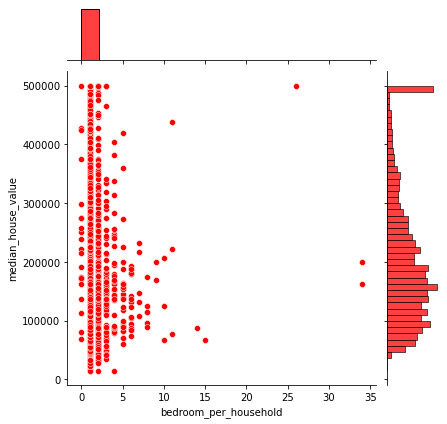

In [29]:
sns.jointplot(x=df.bedroom_per_household , y=df.median_house_value,color="red")

In [30]:
bedroom_per = np.percentile(df.bedroom_per_household,99)
print(bedroom_per)
df[df.bedroom_per_household > bedroom_per*2]

2.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,room_per_household,person_per_household,bedroom_per_household
1024,-120.00,38.52,16.0,3045.0,543.000000,202.0,102.0,3.1500,140600.0,0,1,0,0,0,20.0,2.0,5.0
1102,-121.54,40.06,17.0,858.0,262.000000,47.0,27.0,2.4028,67500.0,0,1,0,0,0,20.0,2.0,10.0
1234,-120.33,38.26,13.0,2962.0,546.000000,252.0,103.0,4.4063,155800.0,0,1,0,0,0,20.0,2.0,5.0
1238,-120.27,38.29,10.0,3486.0,695.000000,298.0,124.0,3.3542,103800.0,0,1,0,0,0,20.0,2.0,6.0
1239,-120.27,38.31,13.0,3297.0,662.000000,267.0,97.0,3.0750,108300.0,0,1,0,0,0,20.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19977,-118.70,35.82,20.0,4642.0,1300.000000,658.0,247.0,2.3937,82100.0,0,1,0,0,0,19.0,3.0,5.0
20069,-120.37,38.01,30.0,473.0,537.870553,242.0,93.0,2.5417,123200.0,0,1,0,0,0,5.0,3.0,6.0
20093,-120.12,38.12,37.0,3355.0,666.000000,338.0,136.0,2.0625,88900.0,0,1,0,0,0,20.0,2.0,5.0
20094,-120.03,38.19,26.0,7005.0,1358.000000,416.0,189.0,2.1250,132500.0,0,1,0,0,0,20.0,2.0,7.0


<ipython-input-31-d993ab94a782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bedroom_per_household[df.bedroom_per_household > bedroom_per*2] = bedroom_per*2


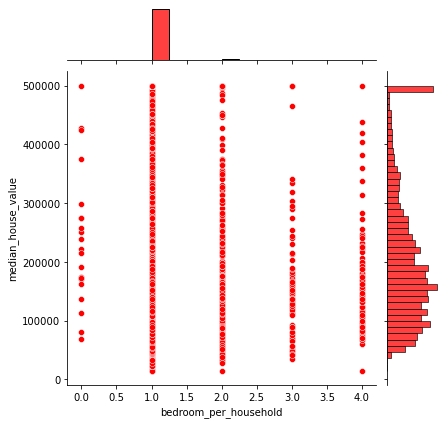

In [31]:
df.bedroom_per_household[df.bedroom_per_household > bedroom_per*2] = bedroom_per*2
sns.jointplot(x=df.bedroom_per_household , y=df.median_house_value,color="red")

In [32]:
del df["total_rooms"]
del df["total_bedrooms"]
del df["population"]
del df["households"]
del df["ocean_proximity_ISLAND"]

In [33]:
df.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,room_per_household,person_per_household,bedroom_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,3.870671,206855.816909,0.442636,0.317393,0.110950,0.128779,5.379118,2.936192,1.040988
std,2.003532,2.135952,12.585558,1.899822,115395.615874,0.496710,0.465473,0.314077,0.334963,1.675305,0.868141,0.281314
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,-121.800000,33.930000,18.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000
50%,-118.490000,34.260000,29.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000
75%,-118.010000,37.710000,37.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,6.000000,3.000000,1.000000
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,20.000000,10.000000,4.000000


In [34]:
df.corr()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,room_per_household,person_per_household,bedroom_per_household
longitude,1.000000,-0.924664,-0.108197,-0.015176,-0.045967,0.321121,-0.055575,-0.474489,0.045509,-0.040131,0.144897,0.022418
latitude,-0.924664,1.000000,0.011173,-0.079809,-0.144160,-0.446969,0.351166,0.358771,-0.160818,0.125119,-0.138810,0.071043
housing_median_age,-0.108197,0.011173,1.000000,-0.119034,0.105623,0.045300,-0.236645,0.255172,0.021622,-0.208725,-0.003675,-0.074214
median_income,-0.015176,-0.079809,-0.119034,1.000000,0.688075,0.168876,-0.237496,0.056197,0.027344,0.489508,-0.051992,-0.041687
median_house_value,-0.045967,-0.144160,0.105623,0.688075,1.000000,0.256617,-0.484859,0.160284,0.141862,0.224329,-0.230805,-0.060972
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,0.168876,0.256617,1.000000,-0.607669,-0.314813,-0.342620,-0.123184,0.118648,-0.101414
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,-0.237496,-0.484859,-0.607669,1.000000,-0.240887,-0.262163,0.184249,0.014749,0.150037
ocean_proximity_NEAR BAY,-0.474489,0.358771,0.255172,0.056197,0.160284,-0.314813,-0.240887,1.000000,-0.135818,-0.034272,-0.129699,-0.037763
ocean_proximity_NEAR OCEAN,0.045509,-0.160818,0.021622,0.027344,0.141862,-0.342620,-0.262163,-0.135818,1.000000,-0.041245,-0.074378,-0.024140
room_per_household,-0.040131,0.125119,-0.208725,0.489508,0.224329,-0.123184,0.184249,-0.034272,-0.041245,1.000000,-0.056291,0.581199


 # Making prediction models

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(df.drop("median_house_value" , axis = 1),df.median_house_value , test_size=0.2 , random_state=77)

In [37]:
import statsmodels.api as sm

In [38]:
X = sm.add_constant(X_train)

In [39]:
model = sm.OLS(Y_train , X).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2770.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:02:48   Log-Likelihood:            -2.0728e+05
No. Observations:               16512   AIC:                         4.146e+05
Df Residuals:                   16500   BIC:                         4.147e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.245e+06   1.05e+05    -21.290      0.000   -2.45e+06   -2.04e+06
longitude                  -2.956e+04   1154.743    -25.599      0.000   -3.18e+04   -2.73e+04
latitude                   -2.913e+04   1140.783    -25.539      0.000   -3.14e+04   -2.69e+04
housing_median_age           887.4934     45.790     19.382      0.000     797.741     977.246
median_income               3.717e+04    411.652     90.300      0.000    3.64e+04     3.8e+04
ocean_proximity_<1H OCEAN  -1.352e+05   3.07e+04     -4.406      0.000   -1.95e+05   -7.51e+04
ocean_proximity_INLAND     -1.755e+05   3.08e+04     -5.700      0.000   -2.36e+05   -1.15e+05
ocean_proximity_NEAR BAY   -1.408e+05   3.07e+04     -4.579      0.000   -2.01e+05   -8.05e+04
ocean_proximity_NEAR OCEAN -1.365e+05   3.07e+04     -4.444      0.000   -1.97e+05   -7.63e+04
room_per_household         -1046.0522    562.534     -1.860      0.063   -2148.680      56.576
person_per_household        -2.65e+04    633.634    -41.821      0.000   -2.77e+04   -2.53e+04
bedroom_per_household       1.746e+04   2817.578      6.197      0.000    1.19e+04     2.3e+04
==============================================================================
Omnibus:                     3614.091   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11007.227
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                       6.302   Cond. No.                     2.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model_2 = LinearRegression()

In [43]:
model_2.fit(X_train , Y_train)

LinearRegression()

In [44]:
y_pre = model_2.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
r2_score( Y_test , model_2.predict(X_test) )

0.6353739434543719

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler().fit(X_train)

In [48]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [49]:
from sklearn.model_selection import validation_curve

In [50]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [51]:
param_range = np.logspace(-3,6,200)

In [52]:
train_score , test_score = validation_curve(Ridge() ,X_train_s,Y_train,param_name="alpha",param_range=param_range,scoring="r2" )

In [53]:
test_score = np.mean(test_score , axis = 1)

In [54]:
test_score_list = list(test_score)
test_score_list.index(np.max(test_score))

59

In [55]:
model_3 = Ridge(alpha = param_range[59])

In [56]:
model_3.fit(X_train_s,Y_train)

Ridge(alpha=0.4659525668664682)

In [57]:
y_pre_ridge = model_3.predict(X_test_s)

In [58]:
r2_score(Y_test , y_pre_ridge)

0.635375531411773

In [59]:
param_range_ = np.logspace(-2,5,500)

In [60]:
train_score , test_score = validation_curve(Lasso(tol=0.001) ,X_train_s,Y_train,param_name="alpha",param_range=param_range_,scoring="r2",n_jobs=-1)

In [61]:
test_score = np.mean(test_score , axis = 1)
test_score_list = list(test_score)
test_score_list.index(np.max(test_score))

0

In [62]:
model_3 = Lasso(max_iter=10000,alpha = param_range_[0])

model_3.fit(X_train_s,Y_train)

X_test_s.shape

y_pre_ridge = model_3.predict(X_test_s)

r2_score(Y_test , y_pre_ridge)

/home/vaibhav/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8619917020825.602, tolerance: 22035394478.119205
  model = cd_fast.enet_coordinate_descent(


0.6353739502190595